In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [349]:
df = pd.read_csv('heart_new.csv')

In [350]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [351]:
df.drop(['ca','thal'],axis = 1,inplace = True)

In [352]:
new_cols = ['age','sex','chest_pain_type','resting_blood_pressure','cholestrol','fasting_blood_sugar','resting_ecg','max_heart_rate','exercise_angina','old_peak','st_slope','target']
df.columns = new_cols

In [353]:
df.shape

(1025, 12)

In [354]:
df['sex']

0       1
1       1
2       1
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: sex, Length: 1025, dtype: int64

In [355]:
df['sex']=df['sex'].apply(lambda m :'male' if m==1 else 'female')

In [356]:
df['chest_pain_type'].unique()

array([0, 1, 2, 3], dtype=int64)

In [357]:
 df['chest_pain_type'][df['chest_pain_type']==0] = 'ta'
 df['chest_pain_type'][df['chest_pain_type']==1] = 'ata'
 df['chest_pain_type'][df['chest_pain_type']==2] = 'nap'
 df['chest_pain_type'][df['chest_pain_type']==3] = 'asy'

C:\Users\ritik\AppData\Local\Temp\ipykernel_10464\1409512890.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['chest_pain_type'][df['chest_pain_type']==0] = 'ta'
C:\Users\ritik\AppData\Local\Temp\ipykernel_10464\1409512890.py:1: Settin

In [358]:
df['chest_pain_type']

0        ta
1        ta
2        ta
3        ta
4        ta
       ... 
1020    ata
1021     ta
1022     ta
1023     ta
1024     ta
Name: chest_pain_type, Length: 1025, dtype: object

In [359]:
df['chest_pain_type'].unique()

array(['ta', 'ata', 'nap', 'asy'], dtype=object)

In [360]:
df['fasting_blood_sugar'].unique()

array([0, 1], dtype=int64)

In [361]:
df['fasting_blood_sugar'][df['fasting_blood_sugar']==0] = 'normal'
df['fasting_blood_sugar'][df['fasting_blood_sugar']==1] = 'high'

C:\Users\ritik\AppData\Local\Temp\ipykernel_10464\8631490.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['fasting_blood_sugar'][df['fasting_blood_sugar']==0] = 'normal'
C:\Users\ritik\AppData\Local\Temp\ipykernel_10464\8631490.py:1: 

In [362]:
df['fasting_blood_sugar']

0       normal
1         high
2       normal
3       normal
4         high
         ...  
1020    normal
1021    normal
1022    normal
1023    normal
1024    normal
Name: fasting_blood_sugar, Length: 1025, dtype: object

In [363]:
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
resting_blood_pressure    0
cholestrol                0
fasting_blood_sugar       0
resting_ecg               0
max_heart_rate            0
exercise_angina           0
old_peak                  0
st_slope                  0
target                    0
dtype: int64

In [364]:
df.duplicated().sum()

723

In [365]:
new_df = pd.read_csv('heart_new.csv')

In [366]:
new_df.duplicated().sum()

723

<Axes: xlabel='target', ylabel='count'>

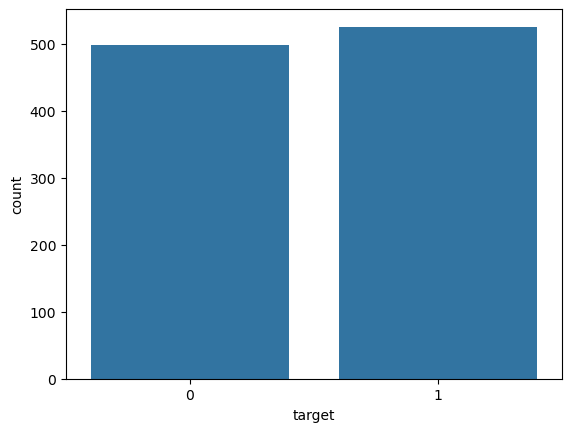

In [367]:
 sns.countplot(data = df,x = "target")

In [368]:
df.duplicated().sum()

723

In [369]:
data= df.drop_duplicates(keep = 'first')

In [370]:
data.duplicated().sum()

0

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt


In [372]:
 data.describe()

,age,resting_blood_pressure,cholestrol,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,0.327815,1.043046,1.397351,0.543046
std,9.04797,17.563394,51.753489,0.526027,22.903527,0.470196,1.161452,0.616274,0.498970
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.000000,0.800000,1.000000,1.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     302 non-null    int64  
 1   sex                     302 non-null    object 
 2   chest_pain_type         302 non-null    object 
 3   resting_blood_pressure  302 non-null    int64  
 4   cholestrol              302 non-null    int64  
 5   fasting_blood_sugar     302 non-null    object 
 6   resting_ecg             302 non-null    int64  
 7   max_heart_rate          302 non-null    int64  
 8   exercise_angina         302 non-null    int64  
 9   old_peak                302 non-null    float64
 10  st_slope                302 non-null    int64  
 11  target                  302 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 30.7+ KB


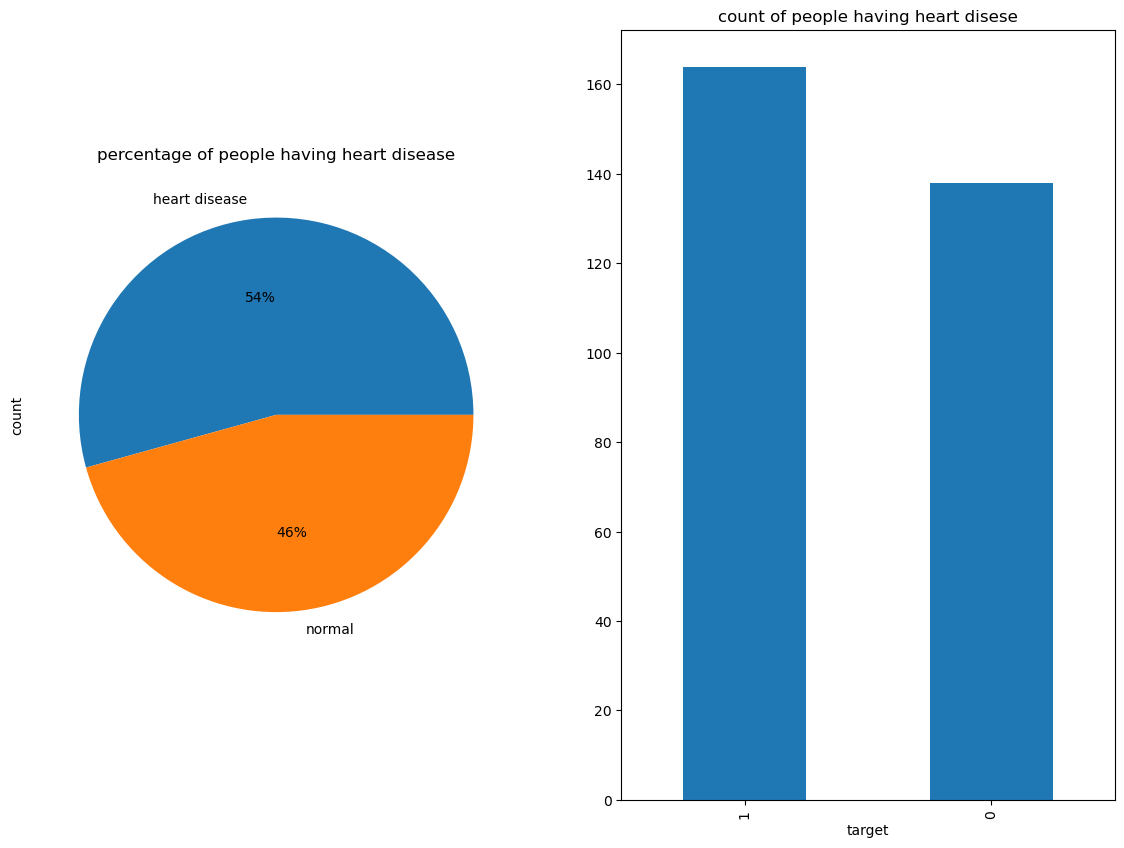

In [374]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(14,10))
ax1=data['target'].value_counts().plot.pie(x='heart disease',y='no of patients',autopct = "%1.0f%%",
                                         labels=['heart disease','normal'],ax=ax1)
ax1.set(title='percentage of people having heart disease')
ax2=data['target'].value_counts().plot(kind='bar',ax=ax2)
ax2.set(title='count of people having heart disese')
plt.show()

In [375]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [376]:
data.shape[0]

302

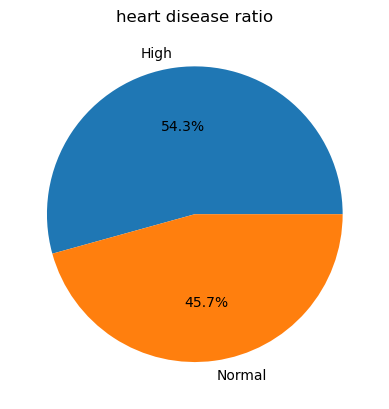

In [377]:
plt.pie(data['target'].value_counts(),autopct= '%0.1f%%',labels = ['High','Normal'])
plt.title('heart disease ratio')
 

plt.show()

 

<BarContainer object of 2 artists>

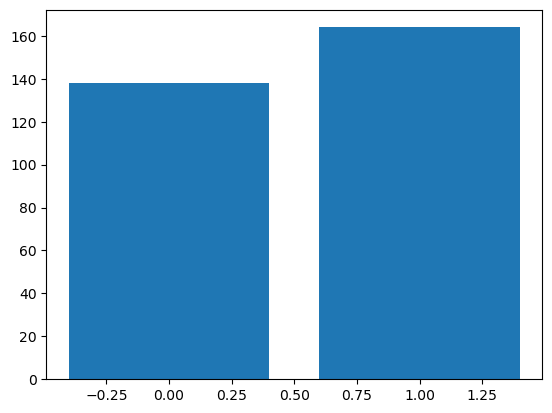

In [378]:
counts = data['target'].value_counts()
plt.bar(counts.index,counts.values  )
 

In [379]:
data['target'].value_counts().values

array([164, 138], dtype=int64)

C:\Users\ritik\AppData\Local\Temp\ipykernel_10464\2530851803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['age'] )


<Axes: ylabel='Density'>

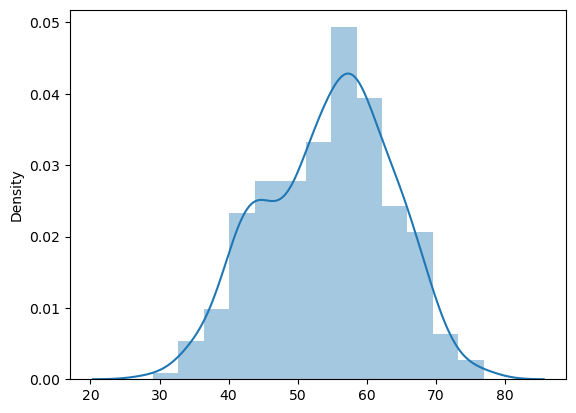

In [380]:
sns.distplot(x=data['age'] )

<Axes: xlabel='sex', ylabel='count'>

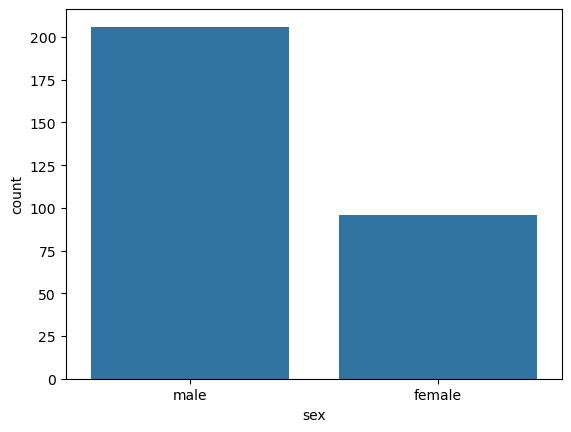

In [381]:
sns.countplot(data = data,x = data['sex'])

In [382]:
data.describe()

,age,resting_blood_pressure,cholestrol,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,0.327815,1.043046,1.397351,0.543046
std,9.04797,17.563394,51.753489,0.526027,22.903527,0.470196,1.161452,0.616274,0.498970
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.000000,0.800000,1.000000,1.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [383]:
df.shape


(1025, 12)

In [384]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
0,52,male,ta,125,212,normal,1,168,0,1.0,2,0
1,53,male,ta,140,203,high,0,155,1,3.1,0,0
2,70,male,ta,145,174,normal,1,125,1,2.6,0,0
3,61,male,ta,148,203,normal,1,161,0,0.0,2,0
4,62,female,ta,138,294,high,1,106,0,1.9,1,0


In [385]:
numeric = df[['age','resting_blood_pressure','cholestrol','max_heart_rate','exercise_angina','old_peak']]

In [386]:
numeric

,age,resting_blood_pressure,cholestrol,max_heart_rate,exercise_angina,old_peak
0,52,125,212,168,0,1.0
1,53,140,203,155,1,3.1
2,70,145,174,125,1,2.6
3,61,148,203,161,0,0.0
4,62,138,294,106,0,1.9
...,...,...,...,...,...,...
1020,59,140,221,164,1,0.0
1021,60,125,258,141,1,2.8
1022,47,110,275,118,1,1.0
1023,50,110,254,159,0,0.0


In [387]:
z = np.abs(stats.zscore(numeric))

In [388]:
z

,age,resting_blood_pressure,cholestrol,max_heart_rate,exercise_angina,old_peak
0,0.268437,0.377636,0.659332,0.821321,0.712287,0.060888
1,0.158157,0.479107,0.833861,0.255968,1.403928,1.727137
2,1.716595,0.764688,1.396233,1.048692,1.403928,1.301417
3,0.724079,0.936037,0.833861,0.516900,0.712287,0.912329
4,0.834359,0.364875,0.930822,1.874977,0.712287,0.705408
...,...,...,...,...,...,...
1020,0.503520,0.479107,0.484803,0.647366,1.403928,0.912329
1021,0.613800,0.377636,0.232705,0.352873,1.403928,1.471705
1022,0.819834,1.234378,0.562371,1.353113,1.403928,0.060888
1023,0.488996,1.234378,0.155137,0.429923,0.712287,0.912329


In [389]:
print (np.where(z>3))

(array([ 54,  55,  69, 123, 151, 158, 175, 179, 192, 246, 267, 294, 296,
       326, 378, 393, 450, 464, 481, 508, 526, 559, 613, 641, 665, 685,
       688, 833, 889, 958, 996], dtype=int64), array([5, 5, 5, 2, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 5, 2, 2, 2, 1, 5, 3,
       5, 2, 2, 2, 1, 5, 2, 2, 2], dtype=int64))


In [390]:
numeric[z<3]

,age,resting_blood_pressure,cholestrol,max_heart_rate,exercise_angina,old_peak
0,52,125.0,212.0,168.0,0,1.0
1,53,140.0,203.0,155.0,1,3.1
2,70,145.0,174.0,125.0,1,2.6
3,61,148.0,203.0,161.0,0,0.0
4,62,138.0,294.0,106.0,0,1.9
...,...,...,...,...,...,...
1020,59,140.0,221.0,164.0,1,0.0
1021,60,125.0,258.0,141.0,1,2.8
1022,47,110.0,275.0,118.0,1,1.0
1023,50,110.0,254.0,159.0,0,0.0


In [391]:
data = data[(z<3).all(axis = 1)]

C:\Users\ritik\AppData\Local\Temp\ipykernel_10464\2706371611.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[(z<3).all(axis = 1)]


In [392]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
0,52,male,ta,125,212,normal,1,168,0,1.0,2,0
1,53,male,ta,140,203,high,0,155,1,3.1,0,0
2,70,male,ta,145,174,normal,1,125,1,2.6,0,0
3,61,male,ta,148,203,normal,1,161,0,0.0,2,0
4,62,female,ta,138,294,high,1,106,0,1.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,female,nap,120,211,normal,0,115,0,1.5,1,1
733,44,female,nap,108,141,normal,1,175,0,0.6,1,1
739,52,male,ta,128,255,normal,1,161,1,0.0,2,0
843,59,male,asy,160,273,normal,0,125,0,0.0,2,0


In [393]:
data =pd.get_dummies(data,drop_first = True)

In [394]:
data.shape

(293, 14)

In [395]:
cor=data.corr()

In [396]:
cor

,age,resting_blood_pressure,cholestrol,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target,sex_male,chest_pain_type_ata,chest_pain_type_nap,chest_pain_type_ta,fasting_blood_sugar_normal
age,1.000000,0.298357,0.184197,-0.102814,-0.399193,0.107290,0.200270,-0.157690,-0.222376,-0.077642,-0.144678,-0.057872,0.132237,-0.119213
resting_blood_pressure,0.298357,1.000000,0.141263,-0.088285,-0.070706,0.063062,0.154336,-0.099182,-0.116645,-0.036953,-0.104866,-0.025542,0.009495,-0.162745
cholestrol,0.184197,0.141263,1.000000,-0.107979,-0.034286,0.086994,0.041079,0.005372,-0.104693,-0.143624,0.001172,-0.080295,0.095147,0.007573
resting_ecg,-0.102814,-0.088285,-0.107979,1.000000,0.066266,-0.075298,-0.038936,0.087748,0.133200,-0.095401,0.082582,0.086045,-0.096472,0.074184
max_heart_rate,-0.399193,-0.070706,-0.034286,0.066266,1.000000,-0.385976,-0.348311,0.375568,0.424389,-0.041589,0.238459,0.156004,-0.362829,0.008069
exercise_angina,0.107290,0.063062,0.086994,-0.075298,-0.385976,1.000000,0.297253,-0.248386,-0.439908,0.149557,-0.234887,-0.265677,0.468007,-0.018726
old_peak,0.200270,0.154336,0.041079,-0.038936,-0.348311,0.297253,1.000000,-0.545190,-0.424826,0.161476,-0.278218,-0.113186,0.251821,-0.001391
st_slope,-0.157690,-0.099182,0.005372,0.087748,0.375568,-0.248386,-0.545190,1.000000,0.330494,-0.059157,0.193148,0.091289,-0.187611,0.059965
target,-0.222376,-0.116645,-0.104693,0.133200,0.424389,-0.439908,-0.424826,0.330494,1.000000,-0.301157,0.255824,0.296858,-0.505567,0.034428
sex_male,-0.077642,-0.036953,-0.143624,-0.095401,-0.041589,0.149557,0.161476,-0.059157,-0.301157,1.000000,-0.058459,-0.117759,0.105009,-0.067074


<Axes: >

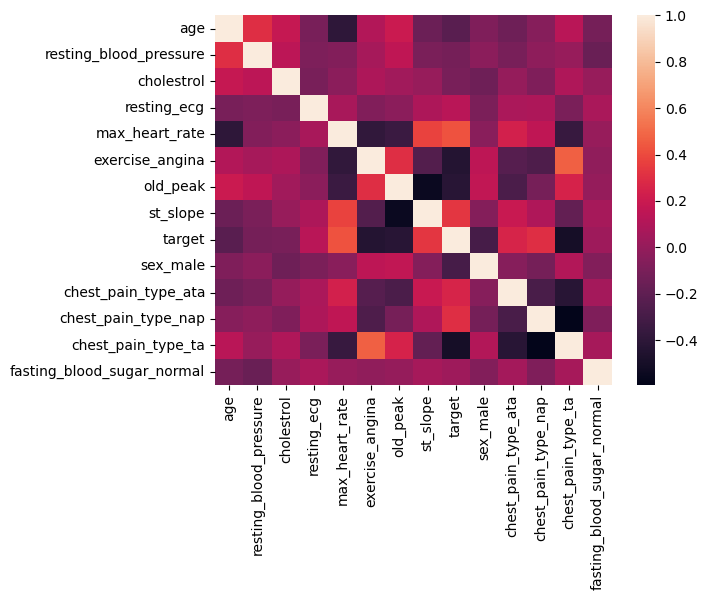

In [397]:
sns.heatmap(cor)

In [398]:
y= data['target']
x = data.drop(['target'],axis = 1)

In [399]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [400]:
y_train.shape

(234,)

In [401]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [402]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
model = RandomForestClassifier()

In [404]:
cv_score = cross_val_score(model,x_train,y_train,cv = 5)

In [405]:
cv_score
cv_score.mean()

0.7650323774283072

In [406]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [407]:
test_score = model.score(x_test,y_test)

In [408]:
test_score

0.7288135593220338

In [409]:
from sklearn.metrics import accuracy_score

In [410]:
y_pred = model.predict(x_test)

In [411]:
accuracy= accuracy_score(y_test,y_pred)

In [412]:
accuracy

0.7288135593220338

In [413]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

In [414]:
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))
 

0.5254237288135594


In [415]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators= 100)
et.fit(x_train,y_train)
y_pred_et = et.predict(x_test)
print(accuracy_score(y_test,y_pred_et))
 

0.7288135593220338


In [416]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)
print(accuracy_score(y_test,y_pred_ada))
 

0.7457627118644068


C:\ProgramData\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [417]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,y_pred_dt))
 

0.6610169491525424


In [418]:
data

,age,resting_blood_pressure,cholestrol,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target,sex_male,chest_pain_type_ata,chest_pain_type_nap,chest_pain_type_ta,fasting_blood_sugar_normal
0,52,125,212,1,168,0,1.0,2,0,True,False,False,True,True
1,53,140,203,0,155,1,3.1,0,0,True,False,False,True,False
2,70,145,174,1,125,1,2.6,0,0,True,False,False,True,True
3,61,148,203,1,161,0,0.0,2,0,True,False,False,True,True
4,62,138,294,1,106,0,1.9,1,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,0,115,0,1.5,1,1,False,False,True,False,True
733,44,108,141,1,175,0,0.6,1,1,False,False,True,False,True
739,52,128,255,1,161,1,0.0,2,0,True,False,False,True,True
843,59,160,273,0,125,0,0.0,2,0,True,False,False,False,True


In [419]:
random_sample = np.array([68, 120, 211, 0, 115, 0, 1.5, 1, 1, 1, 0, 0, 1]).reshape(1, -1)
model.predict(random_sample)[0]

C:\ProgramData\anaconda3\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0

In [421]:
print(x.shape)

(293, 13)


In [422]:
import pickle

In [423]:
with open("heart_model_new.pkl", "wb") as f:
    pickle.dump(model, f)